In [62]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline
#make plot in the notebook
from __future__ import print_function

# Bi-variate linear regression

# 1.1. Basic approach - least square estimate
One of the basic models to try, while learning dependence between two real-valued variables $X$ and $Y$ is linear:
$$
y=w_1 x + w_0.
$$
Admitting that the model's accuracy is not be absolute: 
$$
y=w_1 x + w_0 +\varepsilon,\hspace{5ex} (1)
$$
where $\varepsilon$ is the model's error (often called noise or residual).

The objective is to learn $b$ given a training set of $\{(x_i, y_i), i=1..N\}$. Usually the objetive is to find $w=(w_1,w_0)$ providing the best possible fit of the model, i.e. minimizing absolute values of the errors
$\varepsilon_i=x_i-w_1 y_i-w_0$.

Most common quality function for the given model is the residual sum of squares:
$$
RSS(w)=\sum\limits_i \varepsilon_i^2=\sum\limits_i (y_i-w_1 x_i-w_0)^2. \hspace{5ex} (2)
$$
Minimizing $RSS(w)\to min$ is called a least square approach. With respect to this criteria, regression becomes an optimization problem
$$
\hat{w}=argmin_w RSS(w). \hspace{5ex} (3)
$$
Luckily this problem has a precise analytic solution following from function's shape and local extremum criteria:
$$
\left\{\begin{array}{c}\frac{\partial RSS(\hat{w})}{\partial w_1}=0,\\ \frac{\partial RSS(\hat{w})}{\partial w_0}=0.\end{array}\right.
$$
i.e.
$$
\left\{\begin{array}{c}\sum\limits_i 2x_i(y_i-\hat{w}_1 x_i-\hat{w}_0)=0,\\ \sum\limits_i 2(y_i-\hat{w}_1 x_i-\hat{w}_0)=0,\end{array}\right.
$$
$$
\left\{\begin{array}{c}\hat{w}_1\left(\sum\limits_i (x_i)^2\right)+\hat{w}_0\left(\sum\limits_i x_i\right)=\sum\limits_i x_i y_i,\\ \hat{w}_1\left(\sum\limits_i x_i\right)+N \hat{w}_0=\sum\limits_i y_i,\end{array}\right.
$$
$$
\left\{\begin{array}{c}\hat{w}_1=\frac{\sum\limits_i x_i y_i-\left(\sum\limits_i y_i\right)\left(\sum\limits_i x_i\right)/N}{\sum\limits_i (x_i)^2-\left(\sum\limits_i x_i\right)^2/N}=\frac{E[XY]-E[X]E[Y]}{E[X^2]-E[X]^2}=\frac{E[X-E[X]][Y-E[X]]}{var[X]}=\frac{cov(X,Y)}{var[X]}=corr[X,Y]\frac{std[Y]}{std[X]},\\
\hat{w}_0=\frac{\sum\limits_i y_i-\hat{w}_1\left(\sum\limits_i x_i\right)}{N}=E[Y]-E[X]\hat{w}_1\end{array}\right.
$$

# 1.2. Probabilistic approach

Uncertainty of the model (1) prediction can be expressed by considering $\varepsilon$ as a random variable representing deviations of the actual values of $y$ from the estimates provided by the precise linear model. A basic assumption is to have $\varepsilon\sim{\cal N}(0,\sigma^2)$ (mean is zero as otherwise the intercept term $w_0$ could be corrected accordingly). 

Often observations $y_i,x_i$ are spread in time ($i$ - could be time of the observation). 
Classical regression assumptions (Gauss-Markov): $\sigma$ is the same for all observations (does not depend on time) and errors $\varepsilon_i$ following ${\cal N}(0,\sigma^2)$ are mutually uncorrelated, i.e. $cov(\epsilon_i,\epsilon_j)=0$ for $i\neq j$. 

An alternative way of representing this linear model is by considering $y$ a random variable and expressing it's conditional probability density function with respect to given $x$ and $w$ as
$$
p(y|x,w)={\cal N}(y|w_1 x+w_0,\sigma^2).\hspace{5ex} (4)
$$

This way it is actually the mean of the distribution (4) which is predicted by a linear model/
Now the problem is to fit unknown parameters of the model $w_1,w_0,\sigma$ (the last one $\sigma$ represents how usually close are the values of $y$ to the linear prediction), so that the model is the most consistent with the training data $\{(x_j,y_j), j=1..N\}$.

Fitting could be done through through maximizing the likelihood that the observed data $y_j$ actually follows the suggested distribution (4). Likelihood is defined as a product of probability density values $\prod\limits_j p(y_j|x_j)$. But it's actually more practical to maximize the log-likelihood (which is equivalent):
$$
\log\left(\prod\limits_j p(y_j|x_j)\right)=\sum\limits_j \log\left({\cal N}(y|w_1 x+w_0,\sigma^2)\right)=
$$$$
=-\sum\limits_j \frac{(y_j-w_1 x_j+w_0)^2}{2\sigma^2}- N \log(\sigma)-N \log(\sqrt{2\pi})\to\max
$$
Optimization with respect to $w$ turns out to be equivalent to the above least-square minimization (3). Then for minimal $RSS(\hat{w})$ acheived, $\sigma$ could be found from
$$
\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)\to\min
$$$$
\frac{\partial\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)}{\partial \sigma}=0,
$$$$
-\frac{RSS(\hat{w})}{\sigma^3}+\frac{N}{\sigma}=0,
$$$$
\sigma^2=\frac{RSS(\hat{w})}{N}.
$$

### Example One: Toy example.
$y=5x+10+\varepsilon$

$\varepsilon\sim{\cal N}(0,\sigma^2)$ and $\sigma=10$

In [63]:
#Generate data:
np.random.seed(100)
error=np.random.normal(0,10,1000)
X=range(1000)

In [64]:
error

array([ -1.74976547e+01,   3.42680403e+00,   1.15303580e+01,
        -2.52436037e+00,   9.81320787e+00,   5.14218841e+00,
         2.21179669e+00,  -1.07004333e+01,  -1.89495831e+00,
         2.55001444e+00,  -4.58026986e+00,   4.35163488e+00,
        -5.83595050e+00,   8.16847072e+00,   6.72720806e+00,
        -1.04411143e+00,  -5.31280377e+00,   1.02973269e+01,
        -4.38135623e+00,  -1.11831825e+01,   1.61898166e+01,
         1.54160517e+01,  -2.51879139e+00,  -8.42435738e+00,
         1.84518691e+00,   9.37082201e+00,   7.31000344e+00,
         1.36155613e+01,  -3.26238059e+00,   5.56760149e-01,
         2.22399609e+00,  -1.44321700e+01,  -7.56352306e+00,
         8.16454011e+00,   7.50444762e+00,  -4.55946927e+00,
         1.18962227e+01,  -1.69061683e+01,  -1.35639905e+01,
        -1.23243451e+01,  -5.44439162e+00,  -6.68171737e+00,
         7.31456323e-02,  -6.12938735e+00,   1.29974807e+01,
        -1.73309562e+01,  -9.83310099e+00,   3.57507753e+00,
        -1.61357850e+01,

In [65]:
X

range(0, 1000)

#### (1) Let's generate y and prepare the data for using

In [66]:
#1. What is the type of X,error?
print (type(X))
print (type(error))

<class 'range'>
<class 'numpy.ndarray'>


In [67]:
#2. Change the type of X, to np array
X=np.asarray(X)

In [68]:
print (type(X))
print (type(error))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [69]:
#3.Generate y
y=5*X+10+error
y

array([   -7.49765473,    18.42680403,    31.53035803,    22.47563963,
          39.81320787,    40.14218841,    42.21179669,    34.29956669,
          48.10504169,    57.55001444,    55.41973014,    69.35163488,
          64.1640495 ,    83.16847072,    86.72720806,    83.95588857,
          84.68719623,   105.29732685,    95.61864377,    93.81681754,
         126.18981661,   130.41605175,   117.48120861,   116.57564262,
         131.84518691,   144.37082201,   147.31000344,   158.61556125,
         146.73761941,   155.55676015,   162.22399609,   150.56783005,
         162.43647694,   183.16454011,   187.50444762,   180.44053073,
         201.89622268,   178.09383174,   186.43600951,   192.67565486,
         204.55560838,   208.31828263,   220.07314563,   218.87061265,
         242.99748075,   217.66904376,   230.16689901,   248.57507753,
         233.86421497,   269.70713867,   248.11982403,   259.50253806,
         260.59953838,   266.72067636,   281.08863468,   290.0780959 ,
      

In [70]:
# Pandas Data frame
#1.Make the pandas dataframe.
data=pd.DataFrame([list(X),list(y)]).T
data.head(3)

,0,1
0,0.0,-7.497655
1,1.0,18.426804
2,2.0,31.530358


In [71]:
#2. Change the name for column 0 and 1
data.columns=["x","y"]
data

,x,y
0,0.0,-7.497655
1,1.0,18.426804
2,2.0,31.530358
3,3.0,22.475640
4,4.0,39.813208
5,5.0,40.142188
6,6.0,42.211797
7,7.0,34.299567
8,8.0,48.105042
9,9.0,57.550014


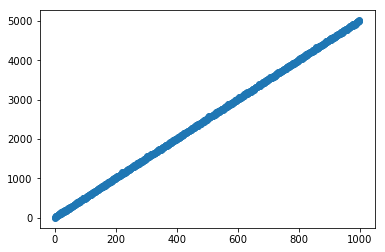

In [72]:
#visualize the data.
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(data.x,data.y)
plt.show()

#### (2) Use OLS to estimate the coefficients by hands

In [73]:
#Take a quick look at the data
data.describe()

,x,y
count,1000.000000,1000.000000
mean,499.500000,2507.332278
std,288.819436,1444.094604
min,0.000000,-7.497655
25%,249.750000,1262.976940
50%,499.500000,2515.668281
75%,749.250000,3755.014732
max,999.000000,5018.283331


#### Correlation. Very important for linear model. If you don't know what is it, check:https://en.wikipedia.org/wiki/Correlation_and_dependence 

In [74]:
#Take a look the correlation of X and y
data.corr()

,x,y
x,1.000000,0.999974
y,0.999974,1.000000


In [75]:
#Calculate the model coefficients. We have closed form for it by OLS.

$$
\left\{\begin{array}{c}\hat{w}_1=\frac{\sum\limits_i x_i y_i-\left(\sum\limits_i y_i\right)\left(\sum\limits_i x_i\right)/N}{\sum\limits_i (x_i)^2-\left(\sum\limits_i x_i\right)^2/N}\\
\hat{w}_0=\frac{\sum\limits_i y_i-\hat{w}_1\left(\sum\limits_i x_i\right)}{N}\end{array}\right.
$$

In [76]:
#2.1 get xy and x-squred term 
data.loc[:,"x_sqr"]=data.x*data.x
data.loc[:,"xy"]=data.x*data.y
data.head(3)

,x,y,x_sqr,xy
0,0.0,-7.497655,0.0,-0.000000
1,1.0,18.426804,1.0,18.426804
2,2.0,31.530358,4.0,63.060716


In [77]:
#2.2 Let's calculate w1. 
w1=(data.xy.sum()-data.y.sum()*data.x.sum()/len(data))/(data.x_sqr.sum()-data.x.sum()*data.x.sum()/len(data))
print("w1 is : {}".format(w1))

w1 is : 4.99985982420905


In [78]:
#2.3 let's calculate w0.
w0=(data.y-data.x*w1).mean()
print("w0 is : {}".format(w0))

w0 is : 9.902296234140358


In [79]:
#2.4. Let's get predicted values and errors
data.loc[:,"pred"]=w1*data.x+w0
data.loc[:,"err"]=data.y-data.pred
data.head(3)

,x,y,x_sqr,xy,pred,err
0,0.0,-7.497655,0.0,-0.000000,9.902296,-17.399951
1,1.0,18.426804,1.0,18.426804,14.902156,3.524648
2,2.0,31.530358,4.0,63.060716,19.902016,11.628342


In [80]:
#2.5. Calculate R-squared.
R_2=1-(data.err**2).sum()/((data.y-data.y.mean())**2).sum()
R_2

0.9999474987704179

#### (3)Let's try package from statsmodels to double check our answer

In [98]:
lm = smf.ols(formula='y ~ x', data = data).fit()

In [99]:
print (lm.params)
print (lm.rsquared)

Intercept    9.902296
x            4.999860
dtype: float64
0.99994749877


In [100]:
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.901e+07
Date:                Tue, 26 Sep 2017   Prob (F-statistic):               0.00
Time:                        18:57:24   Log-Likelihood:                -3766.3
No. Observations:                1000   AIC:                             7537.
Df Residuals:                     998   BIC:                             7546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9023      0.662     14.967      0.0

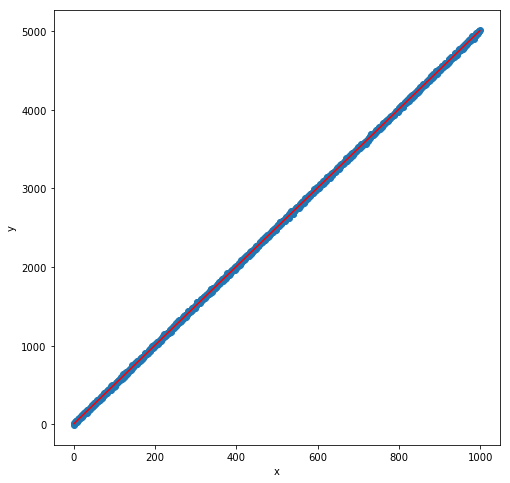

In [102]:
#7. Visualize the model 
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(8,8))
plt.scatter(X,y)
plt.plot(data.x,data.pred,c="r")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [103]:
Xn=(X-X.mean())/X.std()

In [104]:
Xn

array([-1.73031962, -1.72685552, -1.72339142, -1.71992731, -1.71646321,
       -1.71299911, -1.709535  , -1.7060709 , -1.7026068 , -1.69914269,
       -1.69567859, -1.69221449, -1.68875038, -1.68528628, -1.68182218,
       -1.67835807, -1.67489397, -1.67142987, -1.66796576, -1.66450166,
       -1.66103755, -1.65757345, -1.65410935, -1.65064524, -1.64718114,
       -1.64371704, -1.64025293, -1.63678883, -1.63332473, -1.62986062,
       -1.62639652, -1.62293242, -1.61946831, -1.61600421, -1.61254011,
       -1.609076  , -1.6056119 , -1.6021478 , -1.59868369, -1.59521959,
       -1.59175549, -1.58829138, -1.58482728, -1.58136318, -1.57789907,
       -1.57443497, -1.57097087, -1.56750676, -1.56404266, -1.56057856,
       -1.55711445, -1.55365035, -1.55018625, -1.54672214, -1.54325804,
       -1.53979394, -1.53632983, -1.53286573, -1.52940163, -1.52593752,
       -1.52247342, -1.51900932, -1.51554521, -1.51208111, -1.50861701,
       -1.5051529 , -1.5016888 , -1.4982247 , -1.49476059, -1.49

In [105]:
yn=(y-y.mean())/y.std()
yn

array([-1.74232927, -1.72436823, -1.7152898 , -1.72156311, -1.70955126,
       -1.70932334, -1.70788947, -1.71337124, -1.7038065 , -1.69726282,
       -1.69873872, -1.6890864 , -1.69268047, -1.67951379, -1.67704822,
       -1.67896825, -1.67846158, -1.66418243, -1.67088804, -1.67213638,
       -1.64970766, -1.64677963, -1.65574117, -1.65636857, -1.64578949,
       -1.63711146, -1.63507513, -1.62724239, -1.63547169, -1.6293616 ,
       -1.62474239, -1.63281804, -1.62459518, -1.61023432, -1.60722754,
       -1.61212157, -1.5972566 , -1.61374742, -1.60796778, -1.60364481,
       -1.59541412, -1.59280726, -1.58466323, -1.58549637, -1.56878075,
       -1.58632885, -1.57767006, -1.56491647, -1.57510848, -1.55027571,
       -1.56523188, -1.55734568, -1.55658566, -1.5523448 , -1.54239036,
       -1.53616227, -1.54219007, -1.52409566, -1.52983972, -1.5319883 ,
       -1.52846923, -1.51876669, -1.51378388, -1.51187374, -1.5198348 ,
       -1.5122739 , -1.49732801, -1.49301058, -1.48753232, -1.50

In [106]:
dataN=pd.DataFrame([list(Xn),list(yn)]).T
dataN.columns=["x","y"]
dataN.head(3)

,x,y
0,-1.730320,-1.742329
1,-1.726856,-1.724368
2,-1.723391,-1.715290


In [107]:
lm = smf.ols(formula='y ~ x', data = dataN).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.901e+07
Date:                Tue, 26 Sep 2017   Prob (F-statistic):               0.00
Time:                        18:57:38   Log-Likelihood:                 3508.4
No. Observations:                1000   AIC:                            -7013.
Df Residuals:                     998   BIC:                            -7003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.457e-17      0.000  -3.69e-13      1.0

### Excerise 2. Real-world example. Real estate prices in NYC

#### q1. Real Estate Prices in NYC

This is the data on multi-apartment house sale prices in the zip code 10466 (Bronx). Let's see how sale price depends on the house size (besides other relevant parameters)

In [92]:
data_3=pd.read_csv("NYC_RE_10466__multi.csv",index_col=0)
data_3.index=range(len(data_3))
data_3.head()

,gross_sq_feet,sale_price
0,7745,700000.0
1,3700,335000.0
2,5250,510000.0
3,4082,285000.0
4,4082,198558.0


In [109]:
#Q0. What is the min/max of gross_sq_feet and sale_price?
print("min/max of gross_sq_feet and sale_price:{},{},{},{}".format(data_3.gross_sq_feet.max(),data_3.gross_sq_feet.min(),data_3.sale_price.max(),data_3.sale_price.min()))

min/max of gross_sq_feet and sale_price:84340,1620,8865379.0,132500.0


In [110]:
#Q1. What is the correlation of gross_sq_feet and sale_price?
data_3.corr()

,gross_sq_feet,sale_price
gross_sq_feet,1.000000,0.926478
sale_price,0.926478,1.000000


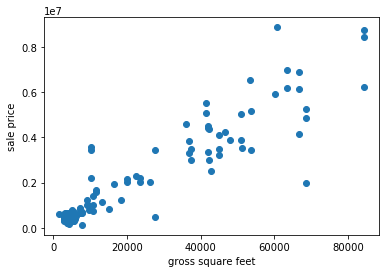

In [112]:
#Q2. Visualize the dataset as a scatterplot
plt.scatter(data_3.gross_sq_feet,data_3.sale_price)
plt.xlabel("gross square feet")
plt.ylabel("sale price")
plt.show()

In [119]:
#Q3. Run linear regression without intercept (add "-1" to the formulae)
lg = smf.ols(formula='sale_price~gross_sq_feet-1',data=data_3).fit()
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1553.
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           6.28e-76
Time:                        19:08:41   Log-Likelihood:                -2040.4
No. Observations:                 136   AIC:                             4083.
Df Residuals:                     135   BIC:                             4086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
gross_sq_feet    90.3653      2.293     39.413      0.000      85.831      94.900
==============================================================================
Omnibus:                       39.275   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.471
Skew:                          -0.490   Prob(JB):                     5.59e-99
Kurtosis:                      11.882   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#Q4. Run linear regression with intercept
lg2 = smf.ols(formula='sale_price~gross_sq_feet',data=data_3).fit()
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     812.1
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           9.99e-59
Time:                        19:08:53   Log-Likelihood:                -2038.2
No. Observations:                 136   AIC:                             4080.
Df Residuals:                     134   BIC:                             4086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.899e+05      9e+04      2.109      0.037    1.18e+04    3.68e+05
gross_sq_feet    86.1409      3.023     28.497      0.000      80.162      92.119
==============================================================================
Omnibus:                       32.516   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.320
Skew:                          -0.039   Prob(JB):                     6.44e-86
Kurtosis:                      11.320   Cond. No.                     3.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
#Q5. Plot the predicted values, observations and the regression line (with intercept)
print(lg2.params)
print(lg2.rsquared)

Intercept        189900.25823
gross_sq_feet        86.14087
dtype: float64
0.858361460655


In [124]:
data_3.head()

,gross_sq_feet,sale_price
0,7745,700000.0
1,3700,335000.0
2,5250,510000.0
3,4082,285000.0
4,4082,198558.0


In [132]:
data_3["pred"] = data_3.gross_sq_feet*lg2.params[1]+lg2.params[0]

In [133]:
data_3["error"] = data_3.pred-data_3.sale_price

In [134]:
data_3.head()

,gross_sq_feet,sale_price,pred,error
0,7745,700000.0,857061.296216,157061.296216
1,3700,335000.0,508621.477152,173621.477152
2,5250,510000.0,642139.825619,132139.825619
3,4082,285000.0,541527.289483,256527.289483
4,4082,198558.0,541527.289483,342969.289483


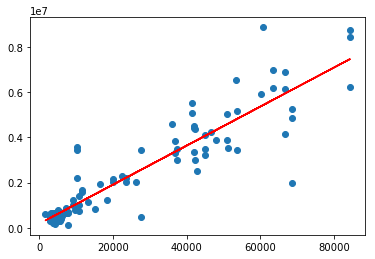

In [136]:
plt.scatter(data_3.gross_sq_feet,data_3.sale_price)
plt.plot(data_3.gross_sq_feet,data_3.pred,c='r')
plt.show()

# Excerise 3. Real-world example. Countries of the world

In [147]:
data_4=pd.read_csv("countries.csv",index_col=0)
data_4

,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547


In [155]:
#Q1. Find the top county by population, area, density, GDP per capita
data_4.Population.idxmax()

'China '

In [156]:
data_4.Area_sqmi.idxmax()

'Russia '

In [157]:
data_4.Pop_Density.idxmax()

'Monaco '

In [158]:
data_4.GDP_percapita.idxmax()

'Luxembourg '

In [33]:
#Q2. Find the average density by performing a regression of population vs area without an intercept

In [160]:
lg3 = smf.ols("Population~Area_sqmi-1",data=data_4).fit()

In [162]:
lg3.params

Area_sqmi    32.6726
dtype: float64

In [166]:
print(lg3.summary())

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     78.73
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           2.21e-16
Time:                        19:47:03   Log-Likelihood:                -4513.1
No. Observations:                 227   AIC:                             9028.
Df Residuals:                     226   BIC:                             9032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Area_sqmi     32.6726      3.682      8.873      0.0

In [170]:
lg3.params[0]

32.672599559063727

In [173]:
lg4 = smf.ols("Population~Area_sqmi+Coastline_area_ratio-1",data=data_4).fit()
lg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     39.19
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           2.49e-15
Time:                        19:55:57   Log-Likelihood:                -4513.1
No. Observations:                 227   AIC:                             9030.
Df Residuals:                     225   BIC:                             9037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Area_sqmi               32.6723      3.690      8.853      0.000      25.400      39.944
Coastline_area_ratio  3280.6334   9.25e+04      0.035      0.972   -1.79e+05    1.86e+05
==============================================================================
Omnibus:                      342.331   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48238.173
Skew:                           7.088   Prob(JB):                         0.00
Kurtosis:                      72.994   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""